In [1]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # ensure that plots are displayed inside the notebook
%matplotlib inline

In [2]:
# import dataset: RNAseq data of cancer
x_data = pd.read_csv('data.csv', index_col="Unnamed: 0")
y_data = pd.read_csv('labels.csv', index_col="Unnamed: 0")


# Upsampling with replacement

In [10]:
#Check class size
classes = y_data.Class.value_counts()

y = y_data.index[y_data['Class'] == classes[0]].tolist()

df_PRAD = x_data.filter(items=y, axis=0)
df_LUAD = x_data.filter(items=y_data.index[y_data['Class'] == classes[1]].tolist(), axis=0)
df_BRCA = x_data.filter(items=y_data.index[y_data['Class'] == classes[2]].tolist(), axis=0)
df_KIRC = x_data.filter(items=y_data.index[y_data['Class'] == classes[3]].tolist(), axis=0)
df_COAD = x_data.filter(items=y_data.index[y_data['Class'] == classes[4]].tolist(), axis=0)
classes
df_PRAD

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530


In [8]:
# Upsample minority class
df_KIRC_upsampled = resample(df_KIRC, replace=True, n_samples=160, random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_PRAD, df_KIRC_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()


ValueError: low >= high

# SMOTE

Class=4, n=300 (20.000%)
Class=3, n=300 (20.000%)
Class=0, n=300 (20.000%)
Class=2, n=300 (20.000%)
Class=1, n=300 (20.000%)


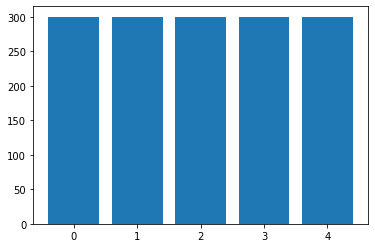

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,2.169755,3.232096,6.721796,9.919899,0.0,6.809873,0.195337,0.0,0.0,...,5.636394,8.398111,10.083236,6.728330,9.802405,12.266030,9.870733,9.530136,6.147427,0.0
1496,0.0,3.871378,3.716623,6.153379,9.671818,0.0,8.296629,0.560940,0.0,0.0,...,5.844287,8.641297,10.086907,6.662739,9.719559,11.849530,10.283726,9.520627,7.043837,0.0
1497,0.0,2.245656,3.338648,7.429125,9.508964,0.0,6.927448,0.000000,0.0,0.0,...,6.039591,8.739971,10.025766,8.209270,10.048084,11.618447,9.873594,10.055558,5.692695,0.0
1498,0.0,4.037755,3.999490,6.835470,9.554311,0.0,7.944074,0.982709,0.0,0.0,...,6.592594,9.196632,10.285581,5.231461,10.006458,10.432698,10.752520,10.052675,5.622329,0.0


In [6]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# label encode the target variable
y = LabelEncoder().fit_transform(y_data.Class.tolist())
# transform the dataset
oversample = SMOTE()
x_data, y = oversample.fit_resample(x_data, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

x_data

NameError: name 'd' is not defined